In [1]:
%matplotlib inline

In [2]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

FS = (10, 7)

In [3]:
lyrics_dir = 'lyrics_frozen'
lyrics_keys = [fname[:-len('.txt')] for fname in os.listdir(lyrics_dir) if fname.endswith('.txt')]
songs = pd.DataFrame(lyrics_keys, columns=['key'])

In [4]:
songs.head()

,key
0,Bjork-Earth_Intruders
1,Andrew_McMahon_-Cecilia_And_The_Sate
2,Danielle_Bradbe-The_Heart_Of_Dixie
3,James_Blunt-Goodbye_My_Lover
4,Taylor_Swift-You_Are_In_Love


In [5]:
raws = []
comps = []
for k in lyrics_keys:
    
    raws.append(os.path.getsize(os.path.join(lyrics_dir, k+'.txt')))
    comps.append(os.path.getsize(os.path.join(lyrics_dir, k+'.txt.gz')))
songs['raw_size'] = raws
songs['compressed_size'] = comps
songs['ratio'] = songs['raw_size'] / songs['compressed_size']

In [6]:
songs.head()

,key,raw_size,compressed_size,ratio
0,Bjork-Earth_Intruders,1459,473,3.084567
1,Andrew_McMahon_-Cecilia_And_The_Sate,1374,499,2.753507
2,Danielle_Bradbe-The_Heart_Of_Dixie,1396,476,2.932773
3,James_Blunt-Goodbye_My_Lover,1541,664,2.320783
4,Taylor_Swift-You_Are_In_Love,1815,641,2.831513


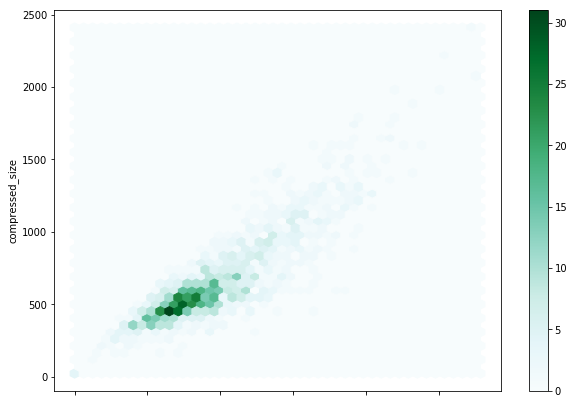

In [12]:
songs.plot.hexbin(x='raw_size', y='compressed_size', figsize=FS, gridsize=45);

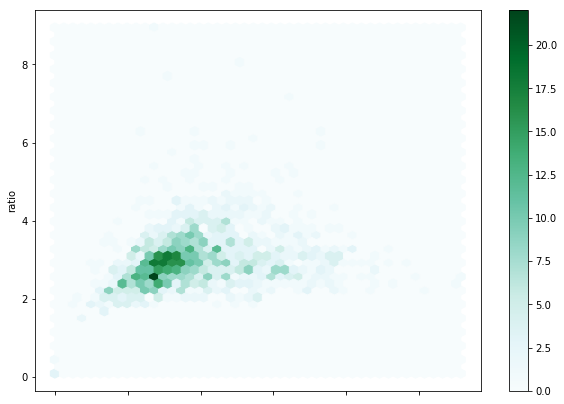

In [20]:
songs.plot.hexbin(x='raw_size', y='ratio', figsize=FS, gridsize=45);

Coefficients: [ 0.31947964]
Bias: 34.775287769
Mean squared error: 21214.69
Variance score: 0.76


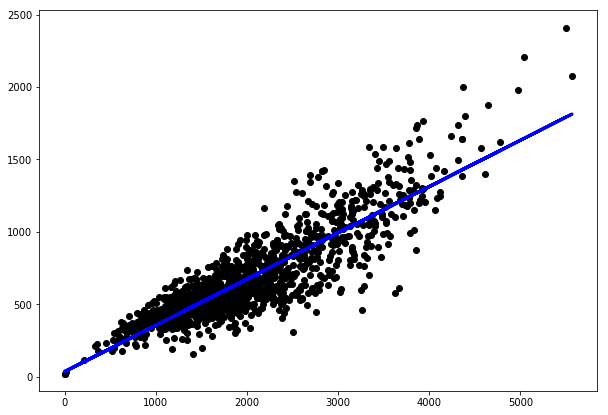

In [47]:
from sklearn import linear_model
import numpy as np

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
X = songs['raw_size'].values.reshape(-1, 1)
Y = songs['compressed_size']
regr.fit(X, Y)

print 'Coefficients: {}'.format(regr.coef_)
print 'Bias: {}'.format(regr.intercept_)

diabetes_X_test = X
diabetes_y_test = Y
print("Mean squared error: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))



if 1:
    # Plot outputs
    fig, ax = plt.subplots(figsize=FS)
    ax.scatter(diabetes_X_test, diabetes_y_test,  color='black')
    ax.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
             linewidth=3)

(1378, 2)
Index([u'raw_size', u'logsize'], dtype='object')
Coefficients: [  2.76056966e-01   1.47028071e-08]
Bias: 108.8443302
Mean squared error: 19900.57
Variance score: 0.78


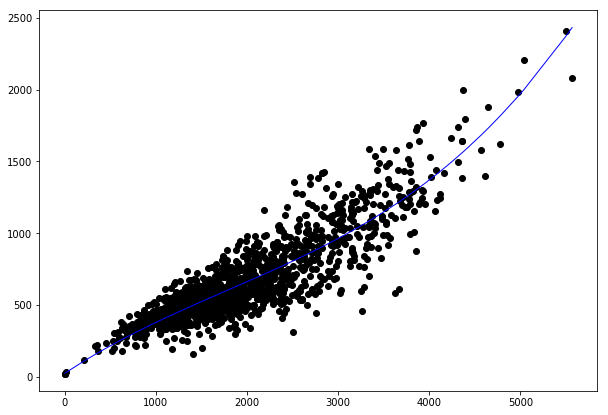

In [87]:
# Add transformed log term
from sklearn import linear_model
import numpy as np

# Create linear regression object
regr = linear_model.LinearRegression()

def size_transform(s):
    b = 1800
    return (s-b)**3

# Train the model using the training sets
X = pd.DataFrame(
    [songs['raw_size'], songs['raw_size'].apply(size_transform).rename('logsize')]
).T
print X.shape
print X.columns
#X = songs['raw_size'].values.reshape(-1, 1)
Y = songs['compressed_size']
regr.fit(X, Y)

print 'Coefficients: {}'.format(regr.coef_)
print 'Bias: {}'.format(regr.intercept_)

X = X.sort_values(by='raw_size')
Y = Y.loc[X.index]
diabetes_X_test = X
diabetes_y_test = Y
print("Mean squared error: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))



if 1:
    # Plot outputs
    fig, ax = plt.subplots(figsize=FS)
    ax.scatter(diabetes_X_test['raw_size'], diabetes_y_test,  color='black')
    ax.plot(diabetes_X_test['raw_size'], regr.predict(diabetes_X_test), color='blue',
             linewidth=1)
    
    foo = pd.DataFrame([X, pd.Series(regr.predict(X))])

In [75]:
foo = X.copy()
foo['pred'] = regr.predict(X)
foo.head(15)

,raw_size,logsize,pred
48,2.0,0.693147,243.785722
1063,2.0,0.693147,243.785722
161,2.0,0.693147,243.785722
1169,14.0,2.639057,177.150273
920,215.0,5.370638,146.044200
1021,337.0,5.820083,171.075283
717,354.0,5.869297,175.050598
228,364.0,5.897154,177.428712
725,450.0,6.109248,198.878824
851,518.0,6.249975,216.819478


Coefficients: [ 2.38783234]
Bias: 388.215030994
Mean squared error: 158561.33
Variance score: 0.76


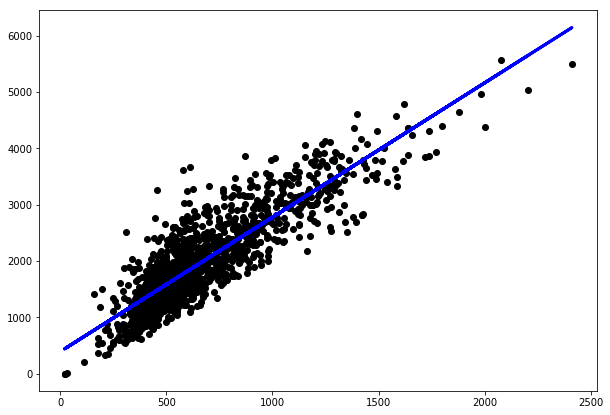

In [49]:
# Swap X and Y
from sklearn import linear_model
import numpy as np

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
Y = songs['raw_size']
X = songs['compressed_size']
X = X.values.reshape(-1, 1)
regr.fit(X, Y)

print 'Coefficients: {}'.format(regr.coef_)
print 'Bias: {}'.format(regr.intercept_)

diabetes_X_test = X
diabetes_y_test = Y
print("Mean squared error: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))



if 1:
    # Plot outputs
    fig, ax = plt.subplots(figsize=FS)
    ax.scatter(diabetes_X_test, diabetes_y_test,  color='black')
    ax.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
             linewidth=3)

Coefficients: [ 0.00020791]
Bias: 2.62924474885
Mean squared error: 0.54
Variance score: 0.05


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


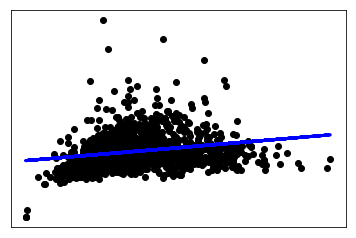

In [40]:
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
X = songs['raw_size'].reshape(-1,1)
#X = (songs['raw_size'] / songs['raw_size'].max()).values.reshape(-1, 1)
Y = songs['ratio']
regr.fit(X, Y)

print 'Coefficients: {}'.format(regr.coef_)
print 'Bias: {}'.format(regr.intercept_)

diabetes_X_test = X
diabetes_y_test = Y
print("Mean squared error: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))



if 1:
    # Plot outputs
    plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
    plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
             linewidth=3)

    plt.xticks(())
    plt.yticks(())

Coefficients: [  8.90228287e-05]
Bias: 0.903656352423
Mean squared error: 0.07
Variance score: 0.07


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


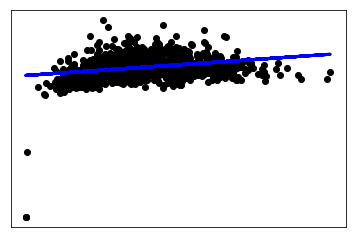

In [45]:
import math
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
X = songs['raw_size']
X = X.reshape(-1,1)
#X = (songs['raw_size'] / songs['raw_size'].max()).values.reshape(-1, 1)
Y = songs['ratio']
Y = Y.apply(math.log)
regr.fit(X, Y)

print 'Coefficients: {}'.format(regr.coef_)
print 'Bias: {}'.format(regr.intercept_)

diabetes_X_test = X
diabetes_y_test = Y
print("Mean squared error: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))



if 1:
    # Plot outputs
    plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
    plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
             linewidth=3)

    plt.xticks(())
    plt.yticks(())

In [29]:
len(songs)

1378

In [32]:
songs['raw_size'].describe()

count    1378.000000
mean     1987.265602
std       818.007646
min         2.000000
25%      1407.500000
50%      1829.500000
75%      2430.250000
max      5567.000000
Name: raw_size, dtype: float64

In [28]:
ssongs = songs.sort_values('ratio')
ssongs.head(50)

,key,raw_size,compressed_size,ratio
48,"Missy_""Misdemea-Work_It",2,22,0.090909
161,Kimberly_Nichol-House_Of_The_Rising_,2,22,0.090909
1063,Kenny_Chesney_&-Feel_Like_A_Rock_Sta,2,22,0.090909
1169,Lindsey_Stirlin-Hallelujah,14,34,0.411765
717,Beyonce_Featuri-Forward,354,224,1.580357
1021,Radiohead-Nude,337,212,1.589623
1151,George_Strait-Troubadour,623,380,1.639474
250,Jack_Ingram-Lips_Of_An_Angel,707,421,1.679335
63,Melanie_Martine-Seven_Nation_Army,636,368,1.728261
946,Glen_Campbell-I'm_Not_Gonna_Miss_Y,547,305,1.793443


In [31]:
ssongs.tail(50)[::-1]

,key,raw_size,compressed_size,ratio
875,Duck_Sauce-Barbra_Streisand,1413,158,8.943038
1140,Silento-Watch_Me,2510,310,8.096774
176,Calvin_Harris-My_Way,1504,197,7.634518
209,Skrillex-First_Of_The_Year_(E,3259,457,7.131291
594,Phillip_Phillip-Home,1868,299,6.247492
1223,French_Montana-Ain't_Worried_About_,3623,581,6.235800
577,David_Guetta_Fe-Memories,1182,190,6.221053
420,Chris_Brown-Turn_Up_The_Music,2754,446,6.174888
289,OK_Go-I_Won't_Let_You_Down,2029,338,6.002959
878,Soulja_Boy-Crank_That_(Soulja_B,3667,611,6.001637
